In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate
%matplotlib inline

In [3]:
class Portfolio:
    def __init__(self, num_stocks):
        self.num_stocks = num_stocks
        self.stocks = []
        self.returns = np.random.randn(self.num_stocks)
        self.stocks = np.exp(np.random.randn(self.num_stocks)) #create n stocks witch normal distributed
        self.stocks = self.stocks/self.stocks.sum() #normalize
        self.cost = np.sum(self.returns) #the cost of portfolio
    
#     def specificWeight(self):
        
        
    def returnCheck(self):
        self.portfolioReturn = np.dot(self.returns, self.stocks)
        return self.portfolioReturn
    
    def portfolioRisk(self, covMatrix):
        return np.sqrt(np.matmul(np.matmul(self.stocks, covMatrix.values), self.stocks))
    
    def portfolioRisk2(self, var):
        return np.dot(self.stocks, np.sqrt(var))

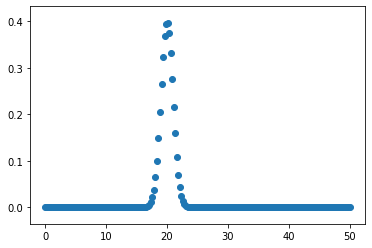

Expectation of portfolio return:  19.999999999999996


In [5]:
def normalPDF(x, exp, var):
    return (1/(np.sqrt(2*np.pi)*np.sqrt(var))) * np.exp((-(x-exp)**2) / (2*var))
    
def expectation(func, a, b):
    return integrate.quad(func, a, b)

#example
r = normalPDF(4, 2, 1)
listX = np.linspace(0, 50, 200)
listY = list(map(lambda x: normalPDF(x, 20, 1), listX))
plt.scatter(listX, listY)
plt.show()
return_Expectation = expectation(lambda x: x*normalPDF(x, 20, 1), 0, 50)[0]
print('Expectation of portfolio return: ', return_Expectation)

### Initialize portfolio

In [103]:
num_stocks = 5
portfolio1 = Portfolio(num_stocks)
stocks = portfolio1.stocks

returns1 = np.array([])
exp1 = np.random.uniform(0, 1, num_stocks) #avereage returns
var1 = np.random.uniform(0, 1, num_stocks) #variance of returns
for item in range(num_stocks):
    returns1 = np.append(returns1, normalPDF(exp1[item]-0.001, exp1[item], var1[item]))
    
print(f'Specific weights: {stocks}', f'| the control sum: {np.sum(stocks)}')
portfolio1.returns = returns1
print('\nReturns of each stocks: ', portfolio1.returns)

Specific weights: [0.07373629 0.32586295 0.13644938 0.12306063 0.34089074] | the control sum: 1.0

Returns of each stocks:  [0.82870926 0.74527414 0.42374691 0.44465276 0.89792449]


### Portfolio return

In [104]:
#Portfolio return
rp = portfolio1.returnCheck()
print(f'The return of portfolio: {rp*100} %')

The return of portfolio: 72.25965777161348 %


### Portfolio risk

In [85]:
print(f'Risk: {portfolio1.portfolioRisk2(var1)*100} %')

Risk: 68.73816362666211 %


### Several portfolios

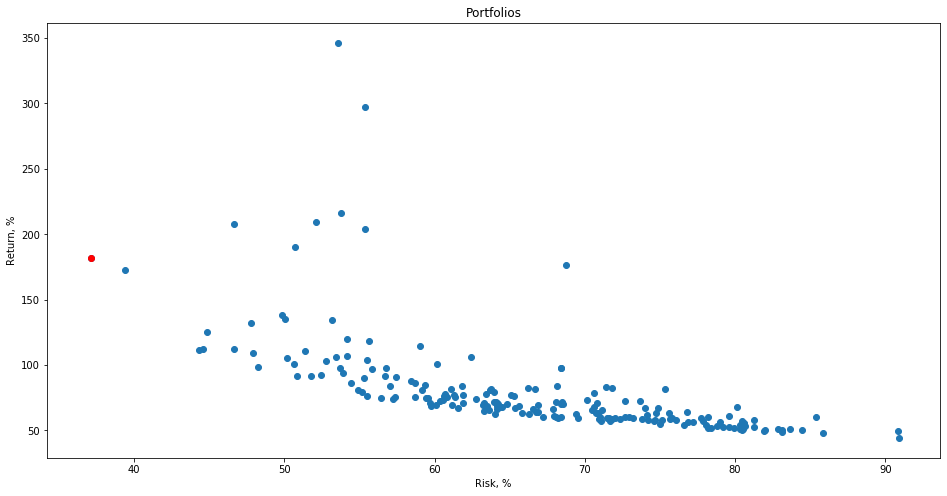

In [9]:
numPort = 200
num_stocks = 10

risks = np.array([])
returns = np.array([])



for _ in range(numPort):
    portfolio = Portfolio(num_stocks)
    
    returns2 = np.array([])
    exp2 = np.random.uniform(0, 1, num_stocks) #avereage returns
    var2 = np.random.uniform(0, 1, num_stocks) #variance of returns
    
    for item in range(num_stocks):
        returns2 = np.append(returns2, normalPDF(exp2[item], exp2[item], var2[item]))
    
    portfolio.returns = returns2
    
    risks = np.append(risks, portfolio.portfolioRisk2(var2))
    returns = np.append(returns, portfolio.returnCheck())
    
plt.figure(figsize=(16,8))
plt.scatter(risks*100, returns*100)
plt.xlabel('Risk, %')
plt.ylabel('Return, %')
plt.title('Portfolios')

minRisk = np.argmin(risks)
plt.scatter(risks[minRisk]*100, returns[minRisk]*100, c='red', marker='o')

# meanPortfolio = Portfolio(num_stocks)
# meanPortfolio.returns = np.ones(num_stocks)/num_stocks
# plt.scatter(100*meanPortfolio.portfolioRisk2(((num_stocks**2)/12)*np.ones(num_stocks)), meanPortfolio.returnCheck()*100, marker='*', c='black')

plt.show()